## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'],  axis=1, inplace=True)

In the following, you can take a look into the dataset.

In [3]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn import model_selection
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

In [6]:
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0) 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
dataset = dataset.rename(columns={'default payment next month': 'default', 
                        'PAY_0': 'PAY_1'})

In [9]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [10]:
#Define predictors and target values
target = 'default'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
y = dataset[target].copy() # target
X = dataset[predictors].copy()


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.3, random_state=42)

In [43]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train,y_train)
dt.score(X_test, y_test)

0.8206666666666667

In [16]:
dt2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

dt2.fit(X_train,y_train)
dt2.score(X_test, y_test)

0.82

In [25]:
print("Decision Tree accuracy : ", accuracy_score(y_test, dt.predict(X_test)))
print("Decision Tree recall : ", recall_score(y_test, dt.predict(X_test)))
print("Decision Tree precision : ", precision_score(y_test, dt.predict(X_test)))

Decision Tree accuracy :  0.8206666666666667
Decision Tree recall :  0.3096938775510204
Decision Tree precision :  0.6993087557603687


#compared dt with dt2, we could see that dt parameters is a better as score higher

In [26]:
y_pred = dt.predict(X_test)

In [27]:
cv_scores =cross_val_score(dt, X, y, cv=5)


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000


Average 5-Fold CV Score: 0.8206 , Standard deviation: 0.0096


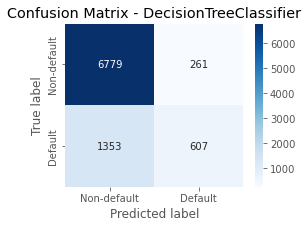

In [28]:
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,dt.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - DecisionTreeClassifier");

In [29]:
y_pred = dt2.predict(X_test)

In [30]:
cv_scores =cross_val_score(dt, X, y, cv=5)


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.42      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000


Average 5-Fold CV Score: 0.8206 , Standard deviation: 0.0096


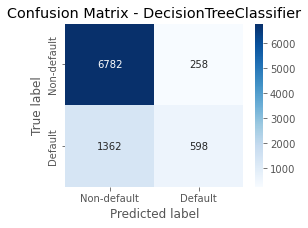

In [31]:
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,dt2.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - DecisionTreeClassifier");

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [32]:
param_grid = {'C': np.logspace(-5, 8, 15)}

In [33]:
logreg = LogisticRegression()

In [34]:
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

In [35]:
logreg_cv.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
                   random_state=0)

In [36]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7822222222222223


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


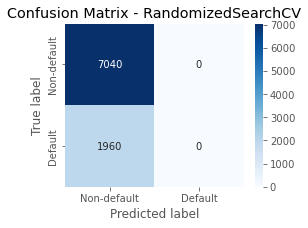

In [37]:
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - RandomizedSearchCV");

#decision tree classifier is better as the 5-fold CV score is higher and standard deviation is lower

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


1) Random Forest

In [38]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.821

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0094


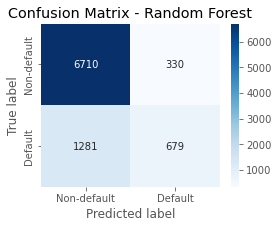

In [39]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

2) Extra Trees Classifier

Accuracy: 0.8133333333333334

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.66      0.29      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000


Average 5-Fold CV Score: 0.8134 , Standard deviation: 0.0083


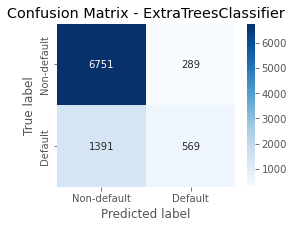

In [42]:
Tree = ExtraTreesClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - ExtraTreesClassifier");

In [48]:
# Append different models
models = []

# Logistic Regression
models.append(('LogReg',
               LogisticRegression(C=3.73, random_state=0),'none'))

# Decision Tree
models.append(('Decision Tree', 
              DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest', 
              RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

#ExtraTrees
models.append(('Extra Trees', 
              ExtraTreesClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:
    if Std == 'Std':
        cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
    elif Std == 'none':
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, Ximp, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogReg: 0.778833 (0.000279)
Decision Tree: 0.815933 (0.006852)
Random Forest: 0.820333 (0.009409)
Extra Trees: 0.801000 (0.003689)


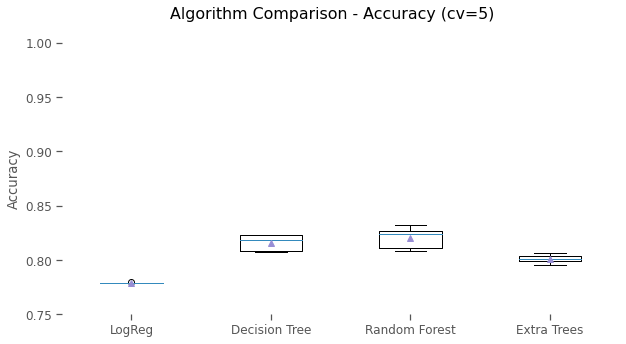

In [50]:
from matplotlib import pyplot
# Plot all the accuracy results vs. each model 
#(model type on the x-axis and accuracy on the y-axis).
fig = pyplot.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=5)')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

The best accuracy is obtained for the Random Forest Classifier with a mean accuracy of 0.82, yet it is the model with higher variation (0.0094). In general, all models have comparable mean accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default). Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

1) The changing hyperparms are supposed to make the model performance more effective, but in the above exercises, for comparison of the dt vs. dt2 (which is the best fit hyperparameters), it actually doesn't improve the performance much.

2) As above comparison, we can see that random forest classifer performed much better than other models whereas logistic regression performed much worse than others. Because Stacked generalization works by deducing the biases of the generalizer(s) with respect to the provided learning set, whereas regression trees when the outcome is continuous. This dadtaset has many deviation, therefore, random forest classifer performed much better.

3) The performance line with the known strengths/weakness of these models:
a) Decision trees are quite powerful solutions for classification and regression problems. However, they have some shortcomings, specifically with numerical features. One of the problems with decision trees is they tend to overfit very easily.Decision trees are also very sensitive to small changes in the data. Small changes not only change the prediction, they could also change the whole structure of the tree drastically.
b) Regression trees as mentioned agove is the outcome is continuous, it can't handle many deviation and can't deduct the biasses of the generalizer(s)
